6.5 Machine Learning - Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/thaliagiraldo/Library/Mobile Documents/com~apple~CloudDocs/CareerFoundry/Immersion/Lesson 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'OHE_cleaned_Feb1.csv'))

In [5]:
df.shape

(362464, 28)

In [6]:
df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'trip_duration', 'trip_distance_miles',
       'trip_date_start', 'trip_date_end', 'start_time', 'end_time',
       'ride_day_of_week', 'ride_day_of_week_numeric', 'hour_start_time',
       'time_of_day', 'classic_bike', 'electric_bike', 'casual', 'member'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,start_time,end_time,ride_day_of_week,ride_day_of_week_numeric,hour_start_time,time_of_day,classic_bike,electric_bike,casual,member
0,0,4EAD8F1AD547356B,electric_bike,11/30/23 21:50,11/30/23 22:13,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.881101,...,9:50 PM,10:13 PM,Thursday,3,21,evening,0,1,0,1
1,1,6322270563BF5470,electric_bike,11/3/23 9:44,11/3/23 10:17,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.952868,...,9:44 AM,10:17 AM,Friday,4,9,morning,0,1,0,1
2,2,B37BDE091ECA38E0,electric_bike,11/30/23 11:39,11/30/23 11:40,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.897533,...,11:39 AM,11:40 AM,Thursday,3,11,morning,0,1,0,1
3,3,CF0CA5DD26E4F90E,classic_bike,11/8/23 10:01,11/8/23 10:27,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,10:01 AM,10:27 AM,Wednesday,2,10,morning,1,0,0,1
4,4,EB8381AA641348DB,classic_bike,11/3/23 16:20,11/3/23 16:54,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,4:20 PM,4:54 PM,Friday,4,16,afternoon,1,0,0,1


In [8]:
#Preprocessing 

In [9]:
#Removed categorical variables 
ml_df = df[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'trip_duration', 'trip_distance_miles',
            'ride_day_of_week_numeric', 'hour_start_time', 'classic_bike', 'electric_bike', 'casual', 'member']]

In [10]:
# dropping all the nan values in trip distance miles - this removes all rows with stolen bikes
ml_df = ml_df.dropna(subset=['trip_distance_miles'])


In [11]:
#Remove extreme values 
ml_df = ml_df[ml_df['trip_duration'] <=178] 

In [12]:
##2. Elbow Technique

In [13]:
num_cl = range(1, 15) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(ml_df).score(ml_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

[-65382701.407432824,
 -35680057.9234319,
 -23392650.188473195,
 -18087010.768995356,
 -13546675.840030814,
 -11257800.411309808,
 -9910443.042816186,
 -8759258.20350521,
 -8022785.043658806,
 -7323181.145030136,
 -6787337.09991275,
 -6351759.487621259,
 -6029755.281995458,
 -5731018.76946145]

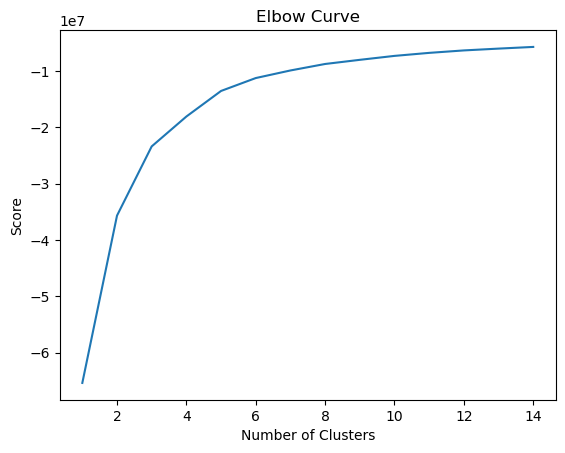

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [16]:
#####There's a large jump from three to five on the x-axis, but after that, the curve straightens out. 
#####5 clusters because at 5 the elbow evens out

k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [18]:
# Fit the k-means object to the data.

kmeans.fit(ml_df)

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [19]:
ml_df['clusters'] = kmeans.fit_predict(ml_df)

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
ml_df.head()

,start_lat,start_lng,end_lat,end_lng,trip_duration,trip_distance_miles,ride_day_of_week_numeric,hour_start_time,classic_bike,electric_bike,casual,member,clusters
0,41.881101,-87.624082,41.949473,-87.646453,23,4.857630,3,21,0,1,0,1,1
1,41.952868,-87.650035,41.952833,-87.649993,33,0.003233,4,9,0,1,0,1,4
2,41.897533,-87.628694,41.897448,-87.628722,1,0.006015,3,11,0,1,0,1,0
3,41.926277,-87.630834,41.926277,-87.630834,26,0.000000,2,10,1,0,0,1,1
4,41.926277,-87.630834,41.926277,-87.630834,34,0.000000,4,16,1,0,0,1,4


In [21]:
ml_df['clusters'].value_counts()

clusters
2    162841
0    107258
1     73462
4     15855
3      2053
Name: count, dtype: int64

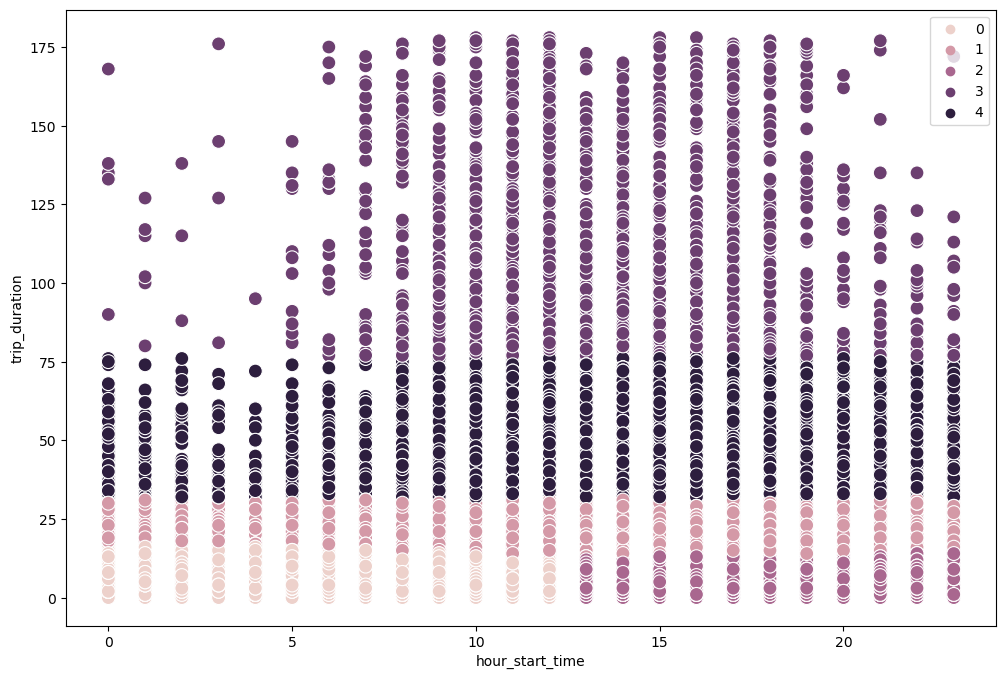

In [22]:
# Plot the clusters for the "hour start time" and "trip duration" variables.
#duration in minutes

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ml_df['hour_start_time'], y=ml_df['trip_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('hour_start_time') # Label x-axis.
plt.ylabel('trip_duration') # Label y-axis.
plt.show()

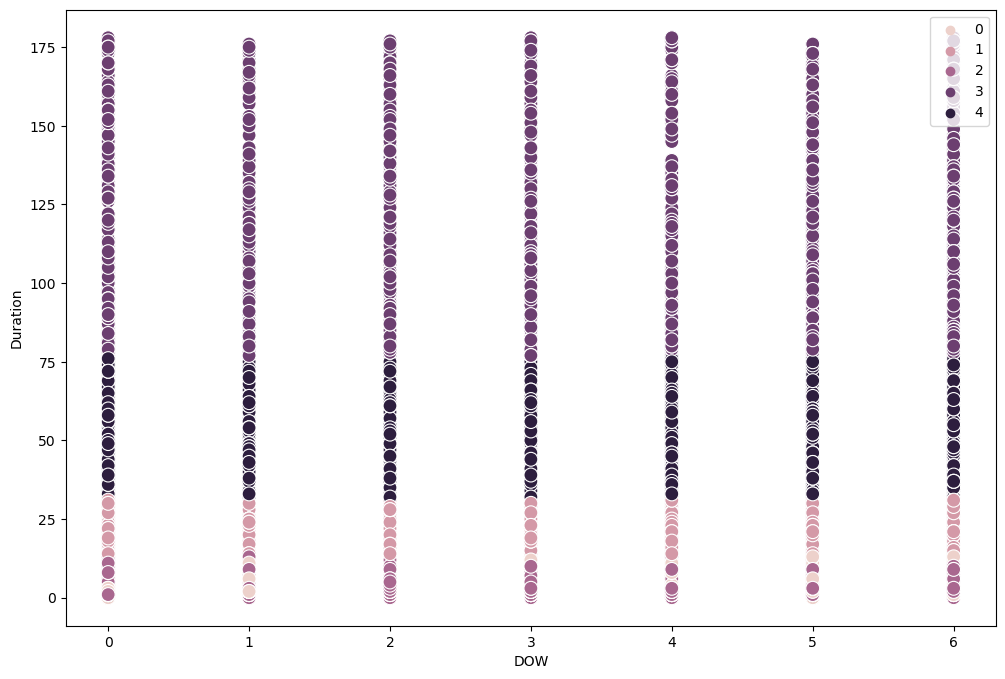

In [23]:
# Plot the clusters for the trip distance and day of the week variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ml_df['ride_day_of_week_numeric'], y=ml_df['trip_duration'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('DOW') 
plt.ylabel('Duration') 
plt.show()

In [24]:
#New column for dataframes to be able to make visualizations
ml_df.loc[ml_df['clusters'] == 4, 'cluster'] = 'black'
ml_df.loc[ml_df['clusters'] == 3, 'cluster'] = 'purple'
ml_df.loc[ml_df['clusters'] == 2, 'cluster'] = 'light purple'
ml_df.loc[ml_df['clusters'] == 1, 'cluster'] = 'pink'
ml_df.loc[ml_df['clusters'] == 0, 'cluster'] = 'light pink'

#Are the clusters related to one another across analysis or am i looking at these clusters individually? 
#in other words, is the black cluster that creates a relationship between high duration trips above 75 minutes related to the black cluster above of high duration trips starting at 9am

In [25]:
#how would i include the OHE i did here? do i put each individual column (bike,e-bike, casual, member)
ml_df.groupby('cluster').agg({'hour_start_time':['mean', 'median'], 
                         'trip_duration':['mean', 'median'], 
                         'trip_distance_miles':['mean', 'median'],
                          'ride_day_of_week_numeric':['mean', 'median']})

hour_start_time        trip_duration        trip_distance_miles  \
                        mean median          mean median                mean   
cluster                                                                        
black              13.742226   14.0     43.159950   40.0            2.793278   
light pink          8.389789    9.0      6.662403    6.0            0.856508   
light purple       17.006497   17.0      6.649959    6.0            0.811354   
pink               14.241131   15.0     19.652133   19.0            2.181530   
purple             13.237701   13.0    109.531417  101.0            1.859957   

                       ride_day_of_week_numeric         
                median                     mean median  
cluster                                                 
black         2.455375                 3.394450    3.0  
light pink    0.741846                 2.798458    3.0  
light purple  0.720018                 2.787511    3.0  
pink          2.102934                 3.077264    3.0  
purple        0.843151                 3.521189    4.0

In [26]:
#Discussion
###Some of these clusters make sense - most noteably BLACK, LIGHT PINK, AND PURPLE
###Black - I think this cluster identifies weekend behavior. This group has the highest average trip duration (ave109 minutes), and it's the only DOW that has median of 4 (Friday), with the mean tending upwards
### Light Pink & Purple - I think these two clusters are the AM and PM work travel. It's the shortest trip duration (ave 6 minutes), and the median start time is 9AM and 5PM, respectively. 
####: Monday
####1: Tuesday
####2: Wednesday
####3: Thursday
####4: Friday
####5: Saturday
####6: Sunday

In [27]:
ml_df.to_csv(os.path.join(path, 'DF_2.17.csv'))